# Implementing K-Nearest Neighbors (KNN) - Similarity Search from scratch

In [1]:
import numpy as np
from collections import Counter

# Distance Function

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# KNN Classifier
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict_point(self, x):
        # Compute distances to all training points
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Find k nearest labels
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]

        # Majority vote
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]
    
    def predict(self, X):
        predictions = [self.predict_point(x) for x in X]
        return np.array(predictions)
    
# Generate sample data for testing
np.random.seed(42)
X_train = np.random.rand(100, 2) # 100 points, 2 features
y_train = (X_train[:, 0] + X_train[:, 1] > 1).astype(int) # simple label rule

# Split test data
X_test = np.random.rand(10, 2)

# Create and evaluate model
model = KNN(k=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Predictions:", predictions)

Predictions: [0 0 0 0 0 1 0 0 0 1]


### visualization

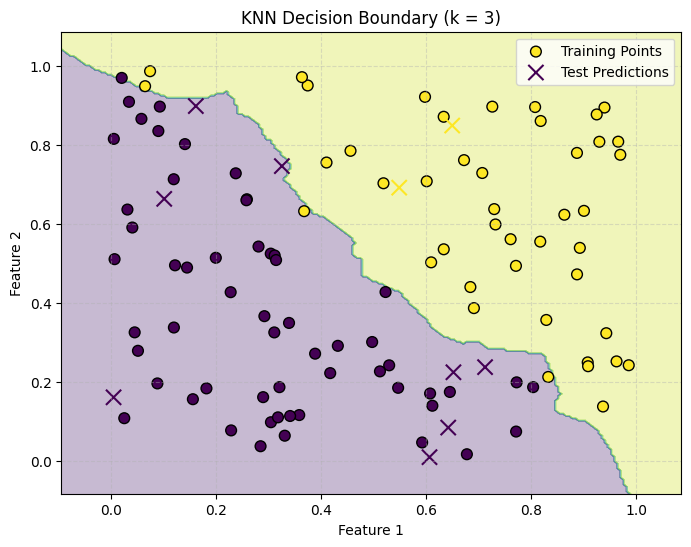

In [2]:
import matplotlib.pyplot as plt

# Create a grid of points for decision boundary visualization
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)  # Soft colored decision regions

# Training data points
plt.scatter(X_train[:, 0], X_train[:, 1],
            c=y_train, edgecolor='k', s=60, label="Training Points")

# Test data points (Predicted)
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=predictions, marker="x", s=120, label="Test Predictions")

plt.title("KNN Decision Boundary (k = 3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.show()
